In [ ]:
"""What are features, detectors, and keypoints?
Features in an image are unique regions that the computer can easily tell apart.
Corners are good examples of features. Finding these unique features is called feature detection.
Once features are detected we need to find similar ones in a different image.
This means we need to describe the features. 
Once you have the features and its description, you can find same features 
in all images and align them, stitch them or do whatever you want.

Harris corner detector is a good example of feature detector. 

Keypoints are the same thing as points of interest. 
They are spatial locations, or points in the image that define what is interesting or what stand out in the image.
The reason why keypoints are special is because no matter how the image changes...
whether the image rotates, shrinks/expands, is translated, or distorted
you should be able to find the same keypoints in this modified image when comparing with the original image.

Harris corner detector detects corners. 
FAST: Features from Accelerated Segment Test - also detects corners


Each keypoint that you detect has an associated descriptor that accompanies it.
SIFT, SURF and ORB all detect and describe the keypoints.

Descriptors are primarily concerned with both the scale and the orientation of the keypoint.

e.g. run ORB and draw keypoints with rich keypoints.
some of these points have a different circle radius. These deal with scale.

The larger the "circle", the larger the scale was that the point was detected at.
Also, there is a line that radiates from the centre of the circle to the edge. 
This is the orientation of the keypoint, which we will cover next

Usually when we want to detect keypoints, we just take a look at the locations. 
However, if you want to match keypoints between images, 
then you definitely need the scale and the orientation to facilitate this.

"""


In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('monkey.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [15]:
gray = np.float32(gray)  #Harris works on float32 images. 
#Input parameters
# image, block size (size of neighborhood considered), ksize (aperture parameter for Sobel), k
harris = cv2.cornerHarris(gray,2,3,0.04) 

In [16]:
# Threshold for an optimal value, it may vary depending on the image.
img[harris>0.01*harris.max()]=[255,0,0]    # replace these pixels with blue

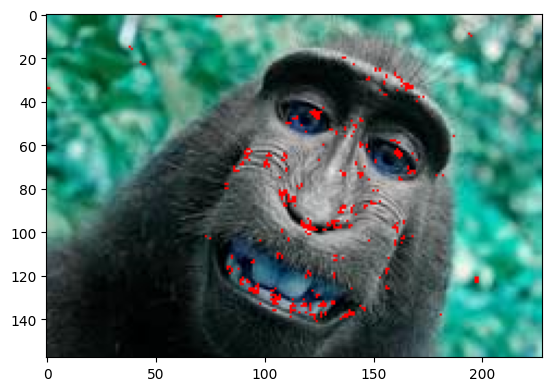

In [17]:
plt.imshow(img)

In [27]:
img = cv2.imread('shapes.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [32]:
#input image, #points, quality level (0-1), min euclidean dist. between detected points
corners = cv2.goodFeaturesToTrack(gray,50,0.05,10)
corners = np.int0(corners)   #np.int0 is int64

for i in corners:
    x,y = i.ravel()   # Ravel Returns a contiguous flattened array.
#    print(x,y)
    cv2.circle(img,(x,y),3,255,-1)  #Draws circle (Img, center, radius, color, etc.)

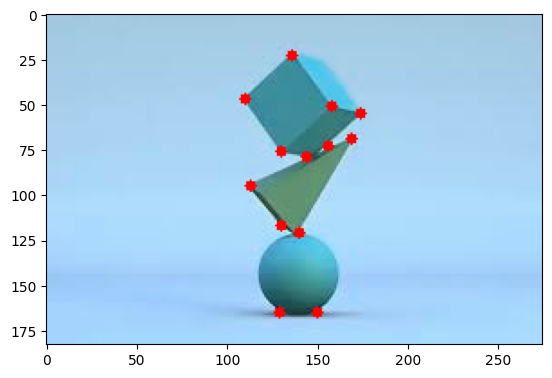

In [33]:
plt.imshow(img)

In [ ]:
#####################################
#SIFT and SURF - do not work in opencv 3
#SIFT stands for scale invariant feature transform
#####################################
# FAST
# Features from Accelerated Segment Test
# High speed corner detector
# FAST is only keypoint detector. Cannot get any descriptors. 


In [34]:
img = cv2.imread('shapes.jpg', 0)

# Initiate FAST object with default values
detector = cv2.FastFeatureDetector_create(50)   #Detects 50 points

kp = detector.detect(img, None)

img2 = cv2.drawKeypoints(img, kp, None, flags=0)


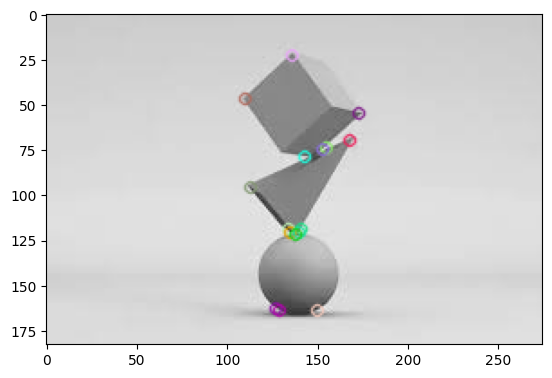

In [36]:
plt.imshow(img2)

In [ ]:
#############################################
#BRIEF (Binary Robust Independent Elementary Features)
#One important point is that BRIEF is a feature descriptor, 
#it doesn’t provide any method to find the features.
# Not going to show the example as BRIEF also not working in opencv 3

###############################################
#ORB
# Oriented FAST and Rotated BRIEF
# An efficient alternative to SIFT or SURF
# ORB is basically a fusion of FAST keypoint detector and BRIEF descriptor

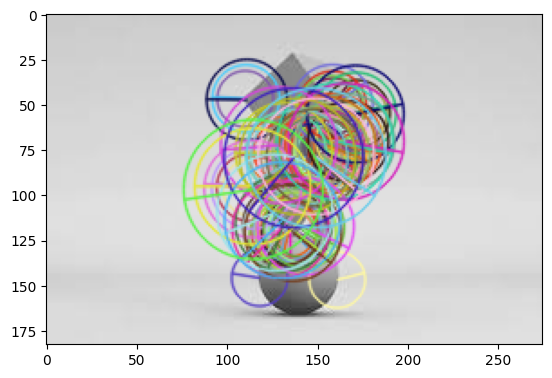

In [40]:
import numpy as np
import cv2

img = cv2.imread('shapes.jpg', 0)

orb = cv2.ORB_create(100)


kp, des = orb.detectAndCompute(img, None)


# draw only keypoints location,not size and orientation
#img2 = cv2.drawKeypoints(img, kp, None, flags=None)
# Now, let us draw with rich key points, reflecting descriptors. 
# Descriptors here show both the scale and the orientation of the keypoint.
img2 = cv2.drawKeypoints(img, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img2)